In [2]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\Anas\\Downloads\\profiles-v2.csv')

# Select the desired variables for clustering
selected_columns = [
    'H indice global',
    'Citations global',
    'H indice_I10 global',
    'H indice depuis 2018',
    'Citations depuis 2018',
    'H indice_I10 depuis 2018',
    'Article'
]


In [3]:
# Extract the selected variables
X = df[selected_columns]


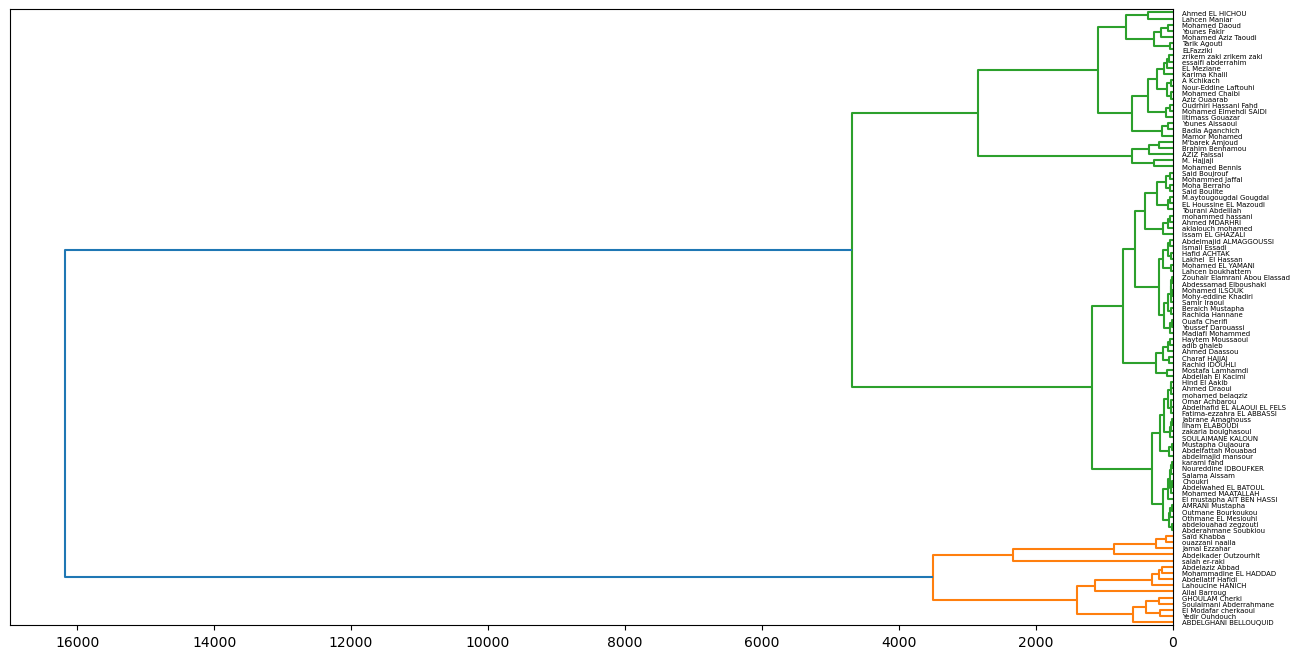

In [4]:
# Increase the size of the dendrogram plot
fig, ax = plt.subplots(figsize=(15, 8))

# Generate the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), labels=df['Nom et Prénom'].tolist(), orientation="left")

# Display the plot
plt.show()


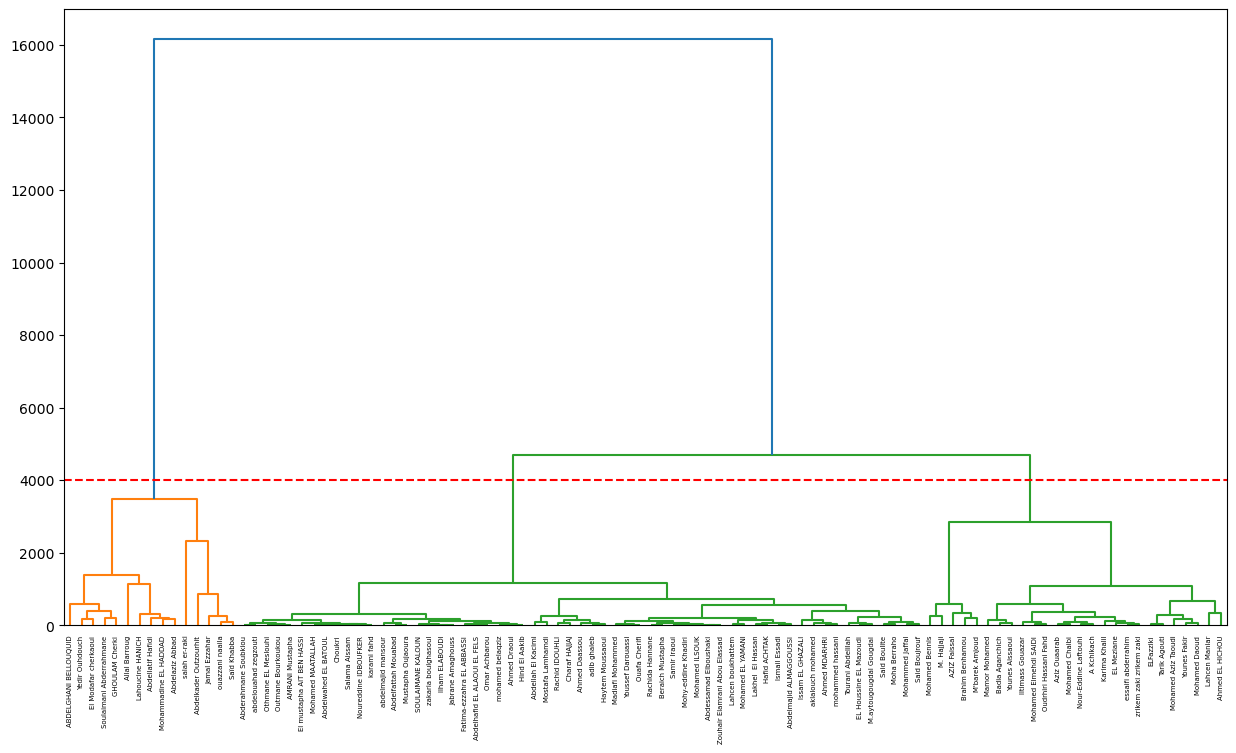

In [5]:
# Increase the size of the dendrogram plot
fig, ax = plt.subplots(figsize=(15, 8))

# Generate the dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), labels=df['Nom et Prénom'].tolist())

# Draw the line to determine clusters
plt.axhline(y=4000, color='r', linestyle='--')

# Display the plot
plt.show()


In [6]:
# Use AgglomerativeClustering to determine cluster contents
agg_clustering = AgglomerativeClustering(n_clusters=3)


In [7]:
# Apply the algorithm on the selected variables
agg_clustering.fit(X)


AgglomerativeClustering(n_clusters=3)

In [8]:
# Create a column to store the generated clusters
df['label'] = agg_clustering.labels_
df.head()


,Nom et Prénom,ASS - Unevercity,Spciality,H indice global,Citations global,H indice_I10 global,H indice depuis 2018,Citations depuis 2018,H indice_I10 depuis 2018,Article,faculty,label
0,salah er-raki,"ProcEDE- FST de Marrakech,Université Cadi Ayyad","physique, irrigation, Agricultural Sciences, r...",37,5257,69,34,3329,63,20,FSTG,0
1,Abdelkader Outzourhit,Université Cadi Ayyad,"Energies renouvelables, PV, Stockage",30,3996,107,22,1916,68,20,Other,0
2,Jamal Ezzahar,"MISCOM, ENSA Safi,Université Cadi Ayyad Marrakech","Land-atmosphere interactions, Soil Moisture, R...",28,3720,46,26,2411,41,20,ENSA,0
3,ouazzani naaila,"professeur à l'université Cadi Ayyad, Marrakech",Wastewater treatment and reuse,31,3582,73,26,2532,61,20,Other,0
4,Saïd Khabba,Professeur de l'Université Cadi Ayyad,"Ressources en eau, Besoin en eau des cultures,...",32,3494,65,28,2507,54,20,Other,0


In [9]:
# Exclude non-numeric columns from the mean calculation
numeric_columns = df.select_dtypes(include='number').columns
mean_result = df.groupby(['label'])[numeric_columns].mean()
print(mean_result)


       H indice global  Citations global  H indice_I10 global  \
label                                                           
0            29.000000       3278.600000            57.666667   
1            15.076923       1001.730769            24.038462   
2             8.966102        329.169492             9.203390   

       H indice depuis 2018  Citations depuis 2018  H indice_I10 depuis 2018  \
label                                                                          
0                 23.800000            2010.666667                 45.800000   
1                 12.346154             632.538462                 16.807692   
2                  7.796610             238.830508                  7.203390   

         Article  label  
label                    
0      20.000000    0.0  
1      19.230769    1.0  
2      18.152542    2.0  


In [10]:
# Display individuals in each cluster
for i in range(3):
    print(f'Cluster {i}')
    print(df[df.label == i]['Nom et Prénom'].tolist())
    print()


Cluster 0
['salah er-raki', 'Abdelkader Outzourhit', 'Jamal Ezzahar', 'ouazzani naaila', 'Saïd Khabba', 'ABDELGHANI BELLOUQUID', 'Soulaimani Abderrahmane', 'GHOULAM Cherki', 'Yedir Ouhdouch', 'El Modafar cherkaoui', 'Allal Barroug', 'Abdellatif Hafidi', 'Lahoucine HANICH', 'Mohammadine EL HADDAD', 'Abdelaziz Abbad']

Cluster 1
['Mohamed Bennis', 'M. Hajjaji', 'Brahim Benhamou', 'Lahcen Maniar', 'AZIZ Faissal', "M'barek Amjoud", 'Ahmed EL HICHOU', 'Mohamed Aziz Taoudi', 'Younes Fakir', 'Mohamed Daoud', 'ELFazziki', 'Tarik Agouti', 'EL Meziane', 'essaifi abderrahim', 'Badia Aganchich', 'zrikem zaki zrikem zaki', 'Mamor Mohamed', 'Aziz Ouaarab', 'Younes Aissaoui', 'Mohamed Chaibi', 'Karima Khalil', 'Nour-Eddine Laftouhi', 'Mohamed Elmehdi SAIDI', 'Oudrhiri Hassani Fahd', 'A Kchikach', 'Iltimass Gouazar']

Cluster 2
['Issam EL GHAZALI', 'Abdellah El Kacimi', 'Ahmed MDARHRI', 'Mostafa Lamhamdi', 'Rachid IDOUHLI', 'aklalouch mohamed', 'mohammed hassani', 'Charaf HAJJAJ', 'Ahmed Daassou', 'ad